In [2]:
#Library loading
library(phyloseq)
library(ggplot2)
library(ape)
library(vegan)
library(microbiome)
library(svglite)
library(tidyr)
library(dplyr)
library(UpSetR)
library(DESeq2)
library(reshape2)
library(scales)

In [3]:
#Loading ASV table
asv=as.matrix(read.table("ASVs_Fw_counts.tsv",row.names=1))
colnames(asv)=c("E1_T1","E2_T1","E1_T2","E2_T2","L1_T1","L2_T1","L1_T2","L2_T2","C2_T1","C1_T2","C2_T2","S2","C1_T1","S1")
asv=asv[, c("E1_T1","E2_T1","E1_T2","E2_T2","L1_T1","L2_T1","L1_T2","L2_T2","C1_T1","C2_T1","C1_T2","C2_T2","S1","S2")]
ASV = otu_table(asv, taxa_are_rows=T)
head(ASV)

,E1_T1,E2_T1,E1_T2,E2_T2,L1_T1,L2_T1,L1_T2,L2_T2,C1_T1,C2_T1,C1_T2,C2_T2,S1,S2
ASV_1,469,332,325,377,0,439,384,398,457,416,515,455,393,488
ASV_2,529,670,313,252,0,520,510,621,17,431,352,622,0,432
ASV_3,189,324,215,297,403,272,258,372,413,337,420,349,423,409
ASV_4,354,197,367,145,149,921,130,403,137,362,213,370,123,674
ASV_5,251,217,245,248,362,317,283,329,325,338,224,400,289,431
ASV_6,293,310,258,176,332,351,338,276,317,266,297,256,220,520


In [4]:
#Loading taxonomy table
tax=as.matrix(read.table("ASVs_Fw_taxonomy.tsv",row.names=1,fill=TRUE))
TAXA=tax_table(tax)
colnames(TAXA)=c("Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Specie")
head(TAXA)

,Kingdom,Phylum,Class,Order,Family,Genus,Specie
ASV_1,Bacteria,Actinobacteria,Actinobacteria,Micromonosporales,Micromonosporaceae,Micromonospora,NA
ASV_2,Bacteria,Actinobacteria,Thermoleophilia,Gaiellales,Gaiellaceae,Gaiella,NA
ASV_3,Bacteria,Actinobacteria,Actinobacteria,Frankiales,Geodermatophilaceae,Geodermatophilus,NA
ASV_4,Bacteria,Firmicutes,Bacilli,Bacillales,Bacillaceae,NA,NA
ASV_5,Bacteria,Actinobacteria,Actinobacteria,Frankiales,Geodermatophilaceae,Geodermatophilus,siccatus
ASV_6,Bacteria,Actinobacteria,Actinobacteria,Frankiales,Geodermatophilaceae,Geodermatophilus,NA


In [5]:
#Creating phyloseq object
buffel1=phyloseq(ASV,TAXA)
#Determine number of ASVs per sample
sample_sums(buffel1)

E1_T1 E2_T1 E1_T2 E2_T2 L1_T1 L2_T1 L1_T2 L2_T2 C1_T1 C2_T1 C1_T2 C2_T2    S1 
26156 29222 32754 29537 14885 48920 23333 30843 32550 35177 27854 30395 30428 
   S2 
32202

In [6]:
#Loading metadata table
buffel_data=read.table("metadata.txt", header=TRUE, row.names=1, sep="\t")
sampledata=sample_data(data.frame(samples=buffel_data$samples,num=buffel_data$num,time=buffel_data$time,days=buffel_data$days,treatment=buffel_data$treatment,row.names=sample_names(buffel1)))
sampledata

,samples,num,time,days,treatment
,<chr>,<int>,<chr>,<int>,<chr>
E1_T1,E1_T1,1,T1,20,E
E2_T1,E2_T1,2,T1,20,E
E1_T2,E1_T2,1,T2,40,E
E2_T2,E2_T2,2,T2,40,E
L1_T1,L1_T1,1,T1,20,L
L2_T1,L2_T1,2,T1,20,L
L1_T2,L1_T2,1,T2,40,L
L2_T2,L2_T2,2,T2,40,L
C1_T1,C1_T1,1,T1,20,C


In [7]:
#Loading tree
buffel_tree=read.tree("tree_ASV_Fw.nwk")
buffel_tree


Phylogenetic tree with 2164 tips and 2162 internal nodes.

Tip labels:
  ASV_252, ASV_449, ASV_1246, ASV_805, ASV_756, ASV_981, ...
Node labels:
  , 0.792, 0.872, 0.892, 0.750, 0.763, ...

Unrooted; includes branch lengths.

In [8]:
#Creating phyloseq object
buffel=phyloseq(ASV,TAXA,sampledata, buffel_tree)
buffel

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2164 taxa and 14 samples ]
sample_data() Sample Data:       [ 14 samples by 5 sample variables ]
tax_table()   Taxonomy Table:    [ 2164 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 2164 tips and 2162 internal nodes ]

In [9]:
#Microbiome profiling and diversity analyses.

In [10]:
#Alpha diversity

Warning message in estimate_richness(physeq, split = TRUE, measures = measures):
“The data you have provided does not have
any singletons. This is highly suspicious. Results of richness
estimates (for example) are probably unreliable, or wrong, if you have already
trimmed low-abundance taxa from the data.

We recommended that you find the un-trimmed data and retry.”


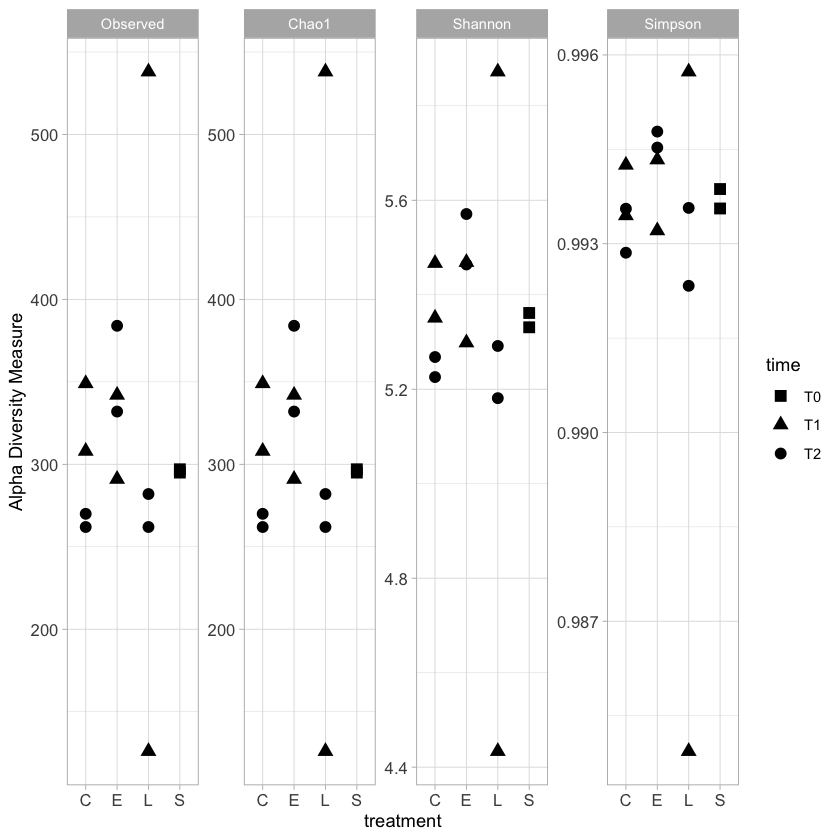

In [11]:
#Creating plot with Diversity Indices
ord=c("E","L","C","S")
violin_richness=plot_richness(buffel, x="treatment", measures=c("Observed", "Shannon", "Simpson","Chao1"), shape="time")
violin_richness + scale_shape_manual(values=c(15,17,16))+theme_light()+geom_point(size=3)+theme(axis.text.y = element_text(size = 10),axis.text.x = element_text(size = 10))

In [12]:
#Obtaining relative abundances at different taxonomic ranks 
#Phylum level
phylum_buffel=tax_glom(buffel, "Phylum")
phylum_buffel
rel_phy=transform_sample_counts(phylum_buffel, function(x) x / sum(x))
#Genus level
gen_buffel=tax_glom(buffel, "Genus")
gen_buffel
rel_gen=transform_sample_counts(gen_buffel, function(x) x / sum(x))

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 24 taxa and 14 samples ]
sample_data() Sample Data:       [ 14 samples by 5 sample variables ]
tax_table()   Taxonomy Table:    [ 24 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 24 tips and 23 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 235 taxa and 14 samples ]
sample_data() Sample Data:       [ 14 samples by 5 sample variables ]
tax_table()   Taxonomy Table:    [ 235 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 235 tips and 233 internal nodes ]

Warning message:
“Transformation introduced infinite values in discrete y-axis”


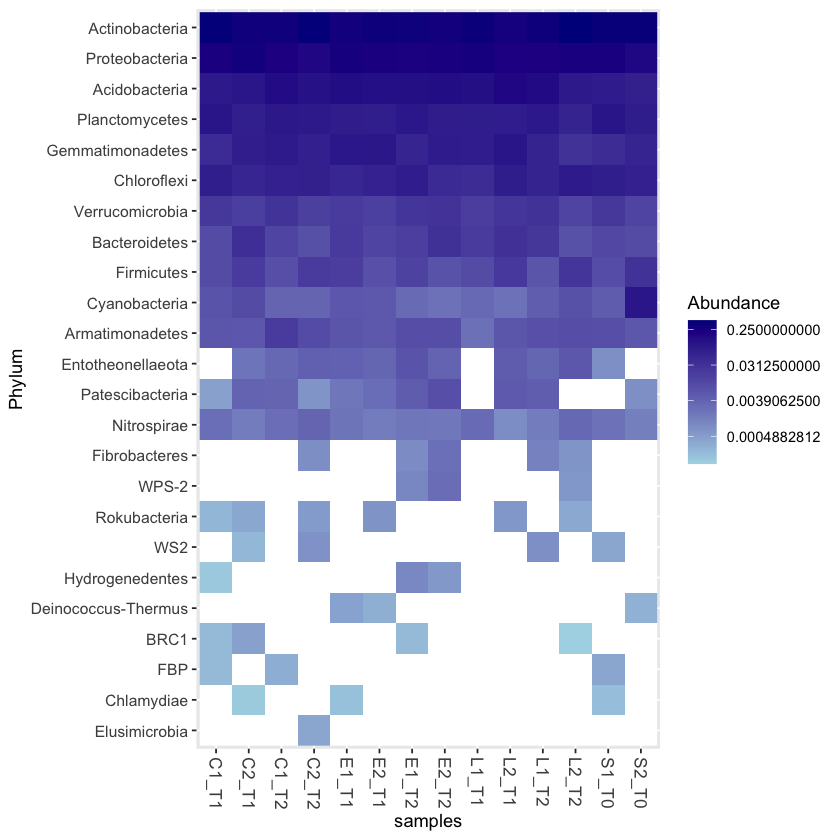

In [13]:
#Creating heatmap at Phylum level
phylum=plot_heatmap(rel_phy, taxa.order=(names(sort(taxa_sums(rel_phy)))), trans=log_trans(2), high="dark blue", low="light blue",na.value="white", sample.label="samples",taxa.label="Phylum",sample.order=c("C1_T1","C2_T1","C1_T2","C2_T2","E1_T1","E2_T1","E1_T2","E2_T2","L1_T1","L2_T1","L1_T2","L2_T2","S1","S2"))
phylum

Warning message:
“Transformation introduced infinite values in discrete y-axis”


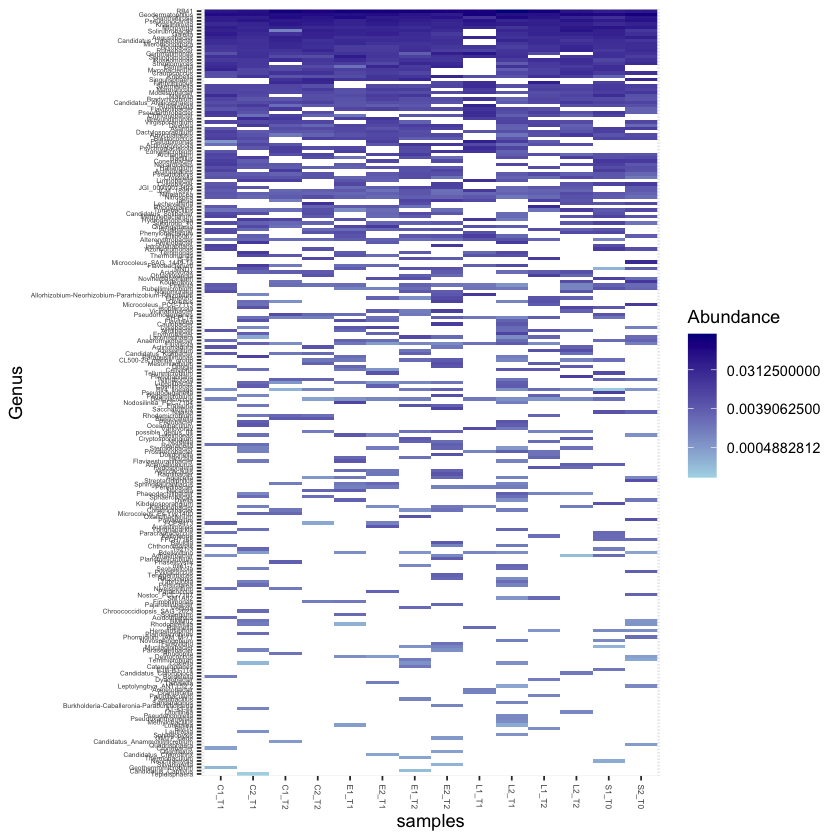

In [14]:
#Creating heatmap at Genus level
genus=plot_heatmap(rel_gen, taxa.order=(names(sort(taxa_sums(rel_gen)))), trans="log2", high="dark blue", low="light blue",na.value="white", sample.label="samples",taxa.label="Genus", sample.order=c("C1_T1","C2_T1","C1_T2","C2_T2","E1_T1","E2_T1","E1_T2","E2_T2","L1_T1","L2_T1","L1_T2","L2_T2","S1","S2"))
genus=genus + theme (axis.text.x = element_text(size=5))
genus

Using Kingdom, Phylum, Class, Order, Family, Genus as id variables

Warning message:
“Use of `fgen_tab$Sample` is discouraged. Use `Sample` instead.”
Warning message:
“Transformation introduced infinite values in discrete y-axis”


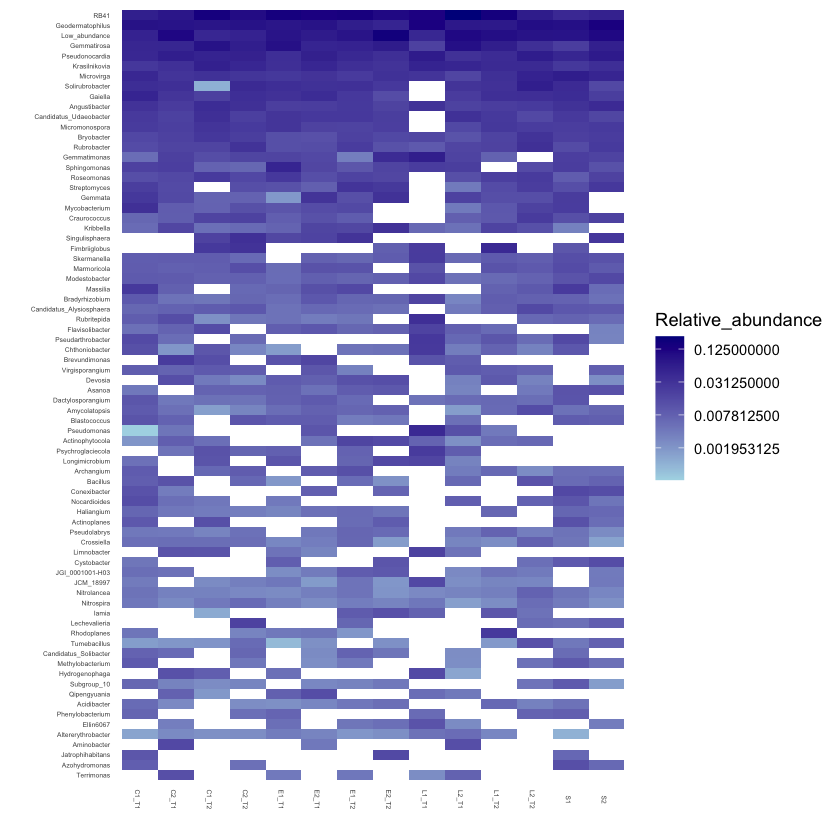

In [15]:
#Plotting a heatmap with the taxonomic profile at genus level but collapsing all genus with less than 0.03 in a category named Low_abundance
otu_gen <- otu_table(rel_gen)
tax_gen <- tax_table(rel_gen)
gen_tab <- cbind(otu_gen, tax_gen)
gen_tab <- gen_tab[, 1:20]
write.table(gen_tab, "gen_tab.tsv", sep = "\t")
gen_tab <- read.table("gen_tab.tsv", header=TRUE, row.names=1, stringsAsFactors = FALSE)
m_gen_tab <- melt(gen_tab)
colnames(m_gen_tab) <- c("Kingdom", "Phylum", "Class", "Order", "Family", "Genus", 
                             "Sample", "Relative_abundance")

cm_gen_tab <- aggregate(m_gen_tab$Relative_abundance,by=list(m_gen_tab$Genus),sum)
colnames(cm_gen_tab) <- c("Genus","Relative_abundance") 
write.csv(cm_gen_tab, "cm_gen_tab.csv")

m_gen_tab$Genus[cm_gen_tab$Relative_abundance[match(m_gen_tab$Genus, cm_gen_tab$Genus)]<=0.03]= "Low_abundance"

fgen_tab <- aggregate(m_gen_tab$Relative_abundance 
                                          ,by=list(m_gen_tab$Genus, 
                                           m_gen_tab$Sample),sum)
colnames(fgen_tab) <- c("Genus", "Sample", "Relative_abundance")
fgen_tab=fgen_tab[order(fgen_tab$Relative_abundance, decreasing=TRUE), ]

#Plot genus
levels1=c("C1_T1","C2_T1","C1_T2","C2_T2","E1_T1","E2_T1","E1_T2","E2_T2","L1_T1","L2_T1","L1_T2","L2_T2","S1","S2")
fgen_tab$Sample=factor(fgen_tab$Sample, levels=levels1)
low_gen = ggplot(fgen_tab, aes(x=fgen_tab$Sample, y=reorder(Genus,Relative_abundance),fill=Relative_abundance)) + 
       geom_tile()+ xlab("") + ylab("") + scale_fill_gradient(high="dark blue", low="light blue", na.value="white", trans="log2") + theme_minimal() 
low_gen=low_gen + theme(axis.text.x = element_text(size=4,angle = -90), axis.text.y = element_text(size=4),panel.grid.major = element_blank())
low_gen

In [16]:
#Core microbiome analysis

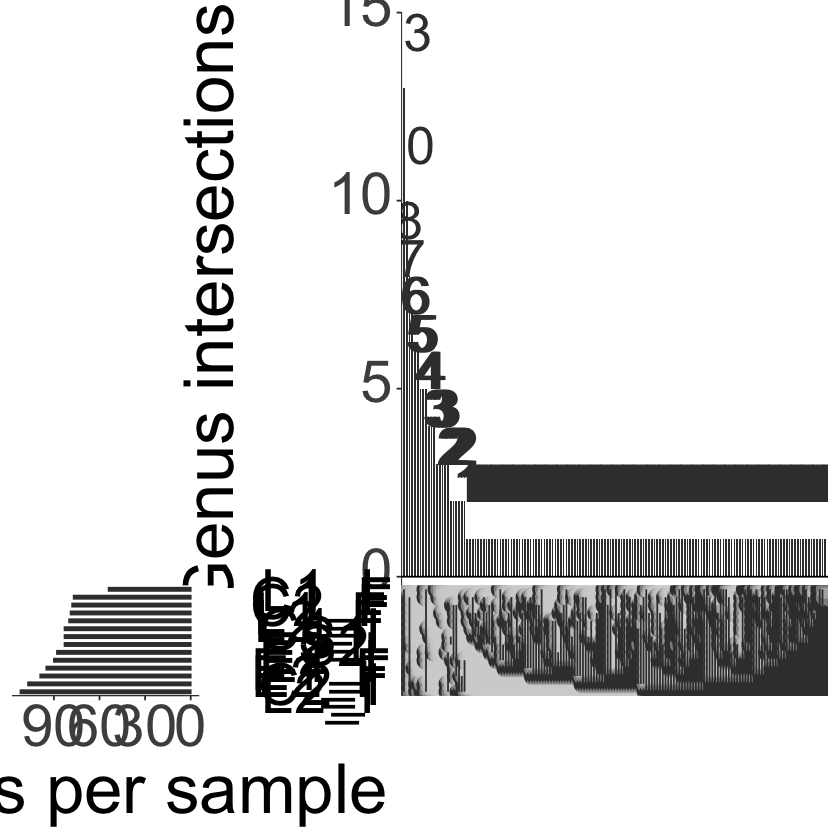

In [17]:
#Generating UpSetR diagram
obuffelf=otu_table(buffel.glom)
obuffelf[obuffelf>0]=1

obuffelf_ups=upset(as.data.frame(obuffelf), nsets=14, order.by="freq", nintersects=NA, number.angles = 0, point.size = 5, line.size = 0.5, mainbar.y.label = "Genus intersections", sets.x.label = "Genus per sample",  text.scale=5)
obuffelf_ups

In [18]:
#Create get_intersect_members function.
get_intersect_members <- function (x, ...){
 require(dplyr)
 require(tibble)
 x <- x[,sapply(x, is.numeric)][,0<=colMeans(x[,sapply(x, is.numeric)],na.rm=T) & colMeans(x[,sapply(x, is.numeric)],na.rm=T)<=1]
 n <- names(x)
 x %>% rownames_to_column() -> x
 l <- c(...)
 a <- intersect(names(x), l)
 ar <- vector('list',length(n)+1)
 ar[[1]] <- x
 i=2
 for (item in n) {
   if (item %in% a){
     if (class(x[[item]])=='integer'){
       ar[[i]] <- paste(item, '>= 1')
       i <- i + 1
     }
   } else {
     if (class(x[[item]])=='integer'){
       ar[[i]] <- paste(item, '== 0')
       i <- i + 1
     }
   }
 }
 do.call(filter_, ar) %>% column_to_rownames() -> x
 return(x)
}

In [19]:
#Obtain buffel core microbiome members.
int.buffel=as.table(otu_table(gen_buffel))
int.buffel=replace(int.buffel, int.buffel>0, 1)
write.table(int.buffel, "int.buffel.ASV.tmp")
buffel.so=read.table("int.buffel.ASV.tmp", header=TRUE, row.names = 1)
buffel_core=get_intersect_members(buffel.so, c(colnames(buffel.so)))
buffel_core

Loading required package: tibble

Warning message:
“`filter_()` was deprecated in dplyr 0.7.0.
Please use `filter()` instead.
See vignette('programming') for more help
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”


,E1_T1,E2_T1,E1_T2,E2_T2,L1_T1,L2_T1,L1_T2,L2_T2,C1_T1,C2_T1,C1_T2,C2_T2,S1,S2
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ASV_41,1,1,1,1,1,1,1,1,1,1,1,1,1,1
ASV_7,1,1,1,1,1,1,1,1,1,1,1,1,1,1
ASV_8,1,1,1,1,1,1,1,1,1,1,1,1,1,1
ASV_31,1,1,1,1,1,1,1,1,1,1,1,1,1,1
ASV_152,1,1,1,1,1,1,1,1,1,1,1,1,1,1
ASV_11,1,1,1,1,1,1,1,1,1,1,1,1,1,1
ASV_36,1,1,1,1,1,1,1,1,1,1,1,1,1,1
ASV_3,1,1,1,1,1,1,1,1,1,1,1,1,1,1
ASV_23,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [20]:
#Obtain the list of shared ASVs from TAXA table using OTUs ids
core_ids=as.vector(rownames(buffel_core))
buffel_core_taxa=TAXA[c(core_ids),]
buffel_core_counts=ASV[c(core_ids),]

#Creating phyloseq object
core=phyloseq(buffel_core_counts,buffel_core_taxa,sampledata)
core

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 13 taxa and 14 samples ]
sample_data() Sample Data:       [ 14 samples by 5 sample variables ]
tax_table()   Taxonomy Table:    [ 13 taxa by 7 taxonomic ranks ]

In [21]:
#Beta diversity analysis 

In [22]:
#Differential abundances 

In [23]:
#Obtaining subset to compare by pairs according to time
T1_list=subset_samples(gen_buffel, time=="T1")
T2_list=subset_samples(gen_buffel, time=="T2")

T1_T2=merge_phyloseq(T1_list, T2_list)

In [24]:
#Converting to DESeq and calling
alpha=0.01
T1_T2_deseq=phyloseq_to_deseq2(T1_T2,~time)
T1_T2_deseq=DESeq(T1_T2_deseq,test="Wald",fitType="local")
res_T1_T2=results(T1_T2_deseq, cooksCutoff=FALSE)
sigtab_T1_T2 = res_T1_T2[which(res_T1_T2$padj < alpha), ]
sigtab_T1_T2
sigtab_T1_T2 = cbind(as(sigtab_T1_T2, "data.frame"), as(tax_table(T1_T2)[rownames(sigtab_T1_T2), ], "matrix"))
write.table(sigtab_T1_T2,file="sigtab_T1_T2",sep="\t",row.names=TRUE)

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



log2 fold change (MLE): time T2 vs T1 
Wald test p-value: time T2 vs T1 
DataFrame with 8 rows and 6 columns
         baseMean log2FoldChange     lfcSE      stat      pvalue        padj
        <numeric>      <numeric> <numeric> <numeric>   <numeric>   <numeric>
ASV_315   33.8473        8.45466   2.05442   4.11535 3.86593e-05 8.76278e-04
ASV_547   17.3113      -22.65750   3.00497  -7.54002 4.69902e-14 6.34383e-12
ASV_179   42.6084        8.78680   2.21182   3.97265 7.10779e-05 1.38094e-03
ASV_460   13.7823       21.47222   3.00521   7.14499 9.00038e-13 3.06013e-11
ASV_568   14.6738       21.56471   3.00509   7.17606 7.17503e-13 3.06013e-11
ASV_472   15.0626      -20.56815   3.00523  -6.84411 7.69501e-12 2.09304e-10
ASV_623   28.0507       -8.30218   2.38830  -3.47619 5.08583e-04 8.64590e-03
ASV_488   14.2566      -22.39004   3.00535  -7.45007 9.32916e-14 6.34383e-12

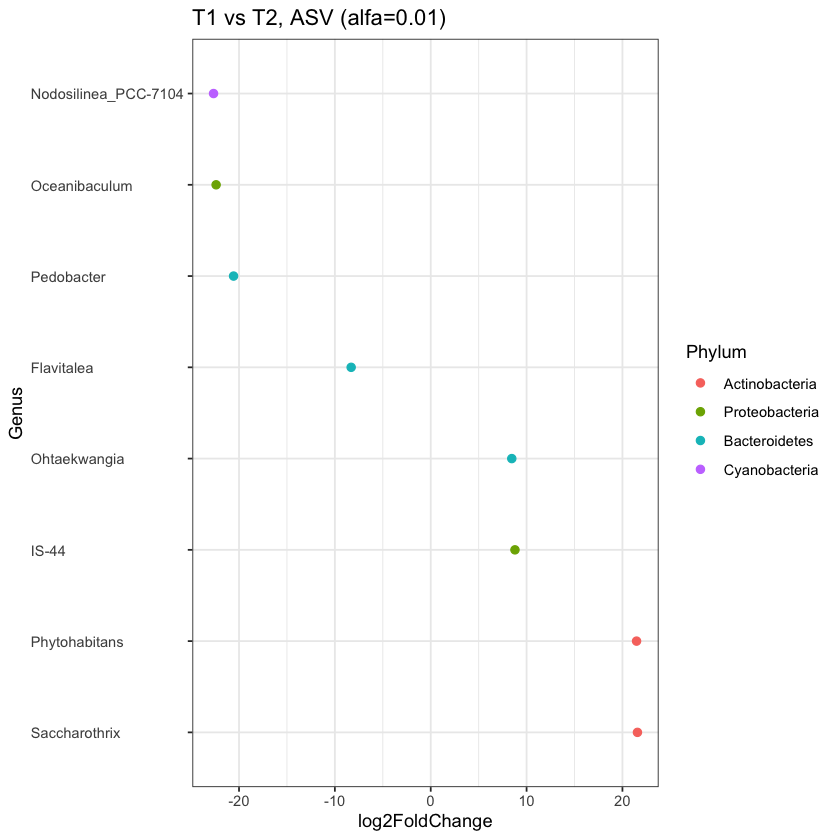

In [25]:
#Exporting tables to csv format 
write.table(sigtab_T1_T2,file="sigtab_T1_T2.tsv",sep="\t",row.names=TRUE)
#Plotting DESeq results for T1 vs T2
theme_set(theme_bw())
scale_fill_discrete <- function(palname = "Set1", ...) {
    scale_fill_brewer(palette = palname, ...)
}
# Phylum order
y = tapply(sigtab_T1_T2$log2FoldChange, sigtab_T1_T2$Phylum, function(y) max(y))
y = sort(y, TRUE)
sigtab_T1_T2$Phylum = factor(as.character(sigtab_T1_T2$Phylum), levels=names(y))
# Genus order
y = tapply(sigtab_T1_T2$log2FoldChange, sigtab_T1_T2$Genus, function(y) max(y))
y = sort(y, TRUE)
sigtab_T1_T2$Genus = factor(as.character(sigtab_T1_T2$Genus), levels=names(y))
ggplot(sigtab_T1_T2, aes(y=Genus, x=log2FoldChange, color=Phylum)) + geom_point(size=2) + ggtitle("T1 vs T2, ASV (alfa=0.01)") + 
  theme(axis.text.y = element_text(angle = 0, hjust = 0, vjust=0.5))

In [26]:
#Obtaining subset to compare by pairs according to treatment
lix_list=subset_samples(gen_buffel, treatment=="L")
ex_list=subset_samples(gen_buffel, treatment=="E")
ctrl_list=subset_samples(gen_buffel,treatment=="C")
soil_list=subset_samples(gen_buffel,treatment=="S")

ex_lix=merge_phyloseq(ex_list, lix_list)
ex_ctrl=merge_phyloseq(ctrl_list, ex_list)
lix_ctrl=merge_phyloseq(ctrl_list,lix_list)

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



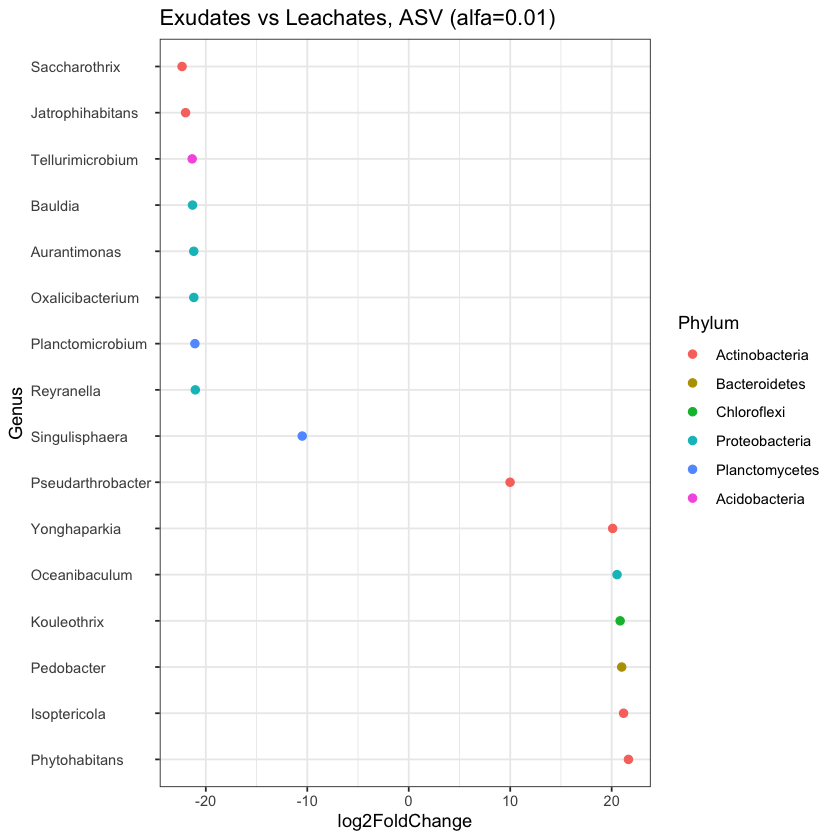

In [27]:
#Converting to DESeq and calling
alpha=0.01
ex_lix_deseq=phyloseq_to_deseq2(ex_lix,~treatment)
ex_lix_deseq=DESeq(ex_lix_deseq,test="Wald",fitType="local")
res_ex_lix=results(ex_lix_deseq, cooksCutoff=FALSE)
sigtab_ex_lix = res_ex_lix[which(res_ex_lix$padj < alpha), ]
sigtab_ex_lix = cbind(as(sigtab_ex_lix, "data.frame"), as(tax_table(ex_lix)[rownames(sigtab_ex_lix), ], "matrix"))
write.table(sigtab_ex_lix,file="sigtab_ex_lix",sep="\t",row.names=TRUE)

#Exporting tables to csv format 
write.table(sigtab_ex_lix,file="sigtab_exlix.tsv",sep="\t",row.names=TRUE)

#Plotting DESeq results for Exudates vs Leachates
theme_set(theme_bw())
scale_fill_discrete <- function(palname = "Set1", ...) {
    scale_fill_brewer(palette = palname, ...)
}
# Phylum order
y = tapply(sigtab_ex_lix$log2FoldChange, sigtab_ex_lix$Phylum, function(y) max(y))
y = sort(y, TRUE)
sigtab_ex_lix$Phylum = factor(as.character(sigtab_ex_lix$Phylum), levels=names(y))
# Genus order
y = tapply(sigtab_ex_lix$log2FoldChange, sigtab_ex_lix$Genus, function(y) max(y))
y = sort(y, TRUE)
sigtab_ex_lix$Genus = factor(as.character(sigtab_ex_lix$Genus), levels=names(y))
ggplot(sigtab_ex_lix, aes(y=Genus, x=log2FoldChange, color=Phylum)) + geom_point(size=2) + ggtitle("Exudates vs Leachates, ASV (alfa=0.01)") + 
  theme(axis.text.y = element_text(angle = 0, hjust = 0, vjust=0.5))

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



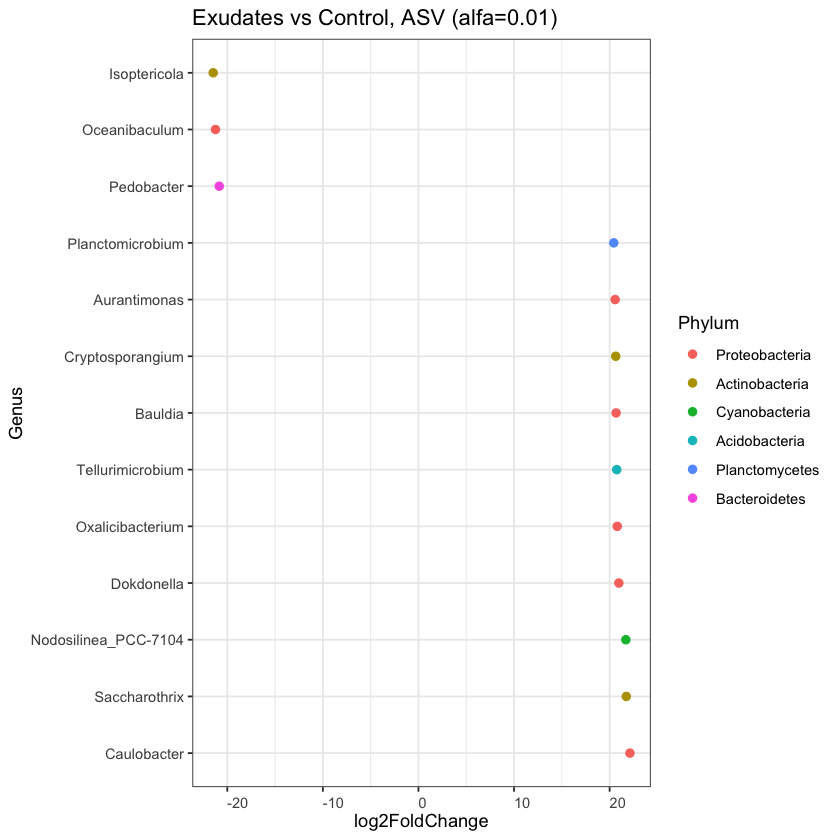

In [28]:
#Converting to DESeq and calling
alpha=0.01
ex_ctrl_deseq=phyloseq_to_deseq2(ex_ctrl,~treatment)
ex_ctrl_deseq=DESeq(ex_ctrl_deseq,test="Wald",fitType="local")
res_ex_ctrl=results(ex_ctrl_deseq, cooksCutoff=FALSE)
sigtab_ex_ctrl = res_ex_ctrl[which(res_ex_ctrl$padj < alpha), ]
sigtab_ex_ctrl = cbind(as(sigtab_ex_ctrl, "data.frame"), as(tax_table(ex_ctrl)[rownames(sigtab_ex_ctrl), ], "matrix"))

#Exporting tables to csv format 
write.table(sigtab_ex_ctrl,file="sigtab_exctrl.tsv",sep="\t",row.names=TRUE)

#Plotting DESeq results for Exudates vs Control
theme_set(theme_bw())
scale_fill_discrete <- function(palname = "Set1", ...) {
    scale_fill_brewer(palette = palname, ...)
}
# Phylum order
y = tapply(sigtab_ex_ctrl$log2FoldChange, sigtab_ex_ctrl$Phylum, function(y) max(y))
y = sort(y, TRUE)
sigtab_ex_ctrl$Phylum = factor(as.character(sigtab_ex_ctrl$Phylum), levels=names(y))
# Genus order
y = tapply(sigtab_ex_ctrl$log2FoldChange, sigtab_ex_ctrl$Genus, function(y) max(y))
y = sort(y, TRUE)
sigtab_ex_ctrl$Genus = factor(as.character(sigtab_ex_ctrl$Genus), levels=names(y))
ggplot(sigtab_ex_ctrl, aes(y=Genus, x=log2FoldChange, color=Phylum)) + geom_point(size=2) + ggtitle("Exudates vs Control, ASV (alfa=0.01)") + 
  theme(axis.text.x = element_text(angle =0, hjust = 0, vjust=0.5))

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



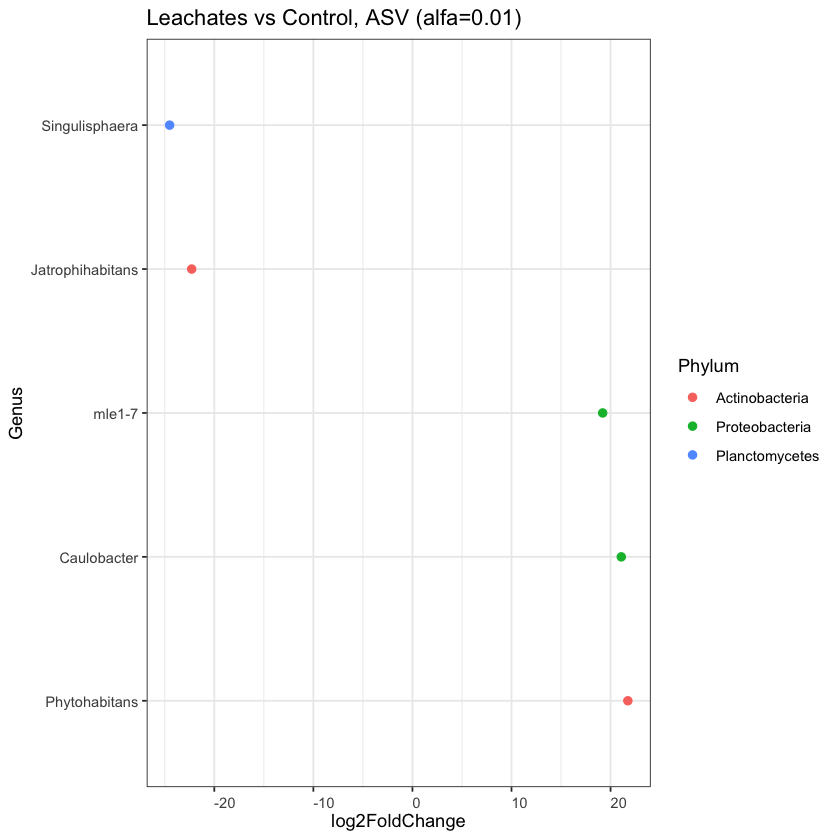

In [29]:
#Converting to DESeq and calling
alpha=0.01
lix_ctrl_deseq=phyloseq_to_deseq2(lix_ctrl,~treatment)
lix_ctrl_deseq=DESeq(lix_ctrl_deseq,test="Wald",fitType="local")
res_lix_ctrl=results(lix_ctrl_deseq, cooksCutoff=FALSE)
sigtab_lix_ctrl = res_lix_ctrl[which(res_lix_ctrl$padj < alpha), ]
sigtab_lix_ctrl = cbind(as(sigtab_lix_ctrl, "data.frame"), as(tax_table(lix_ctrl)[rownames(sigtab_lix_ctrl), ], "matrix"))

#Exporting tables to csv format 
write.table(sigtab_lix_ctrl,file="sigtab_lixctrl.tsv",sep="\t",row.names=TRUE)

#Plotting DESeq results for Leachates vs Control
theme_set(theme_bw())
scale_fill_discrete <- function(palname = "Set1", ...) {
    scale_fill_brewer(palette = palname, ...)
}
# Phylum order
y = tapply(sigtab_lix_ctrl$log2FoldChange, sigtab_lix_ctrl$Phylum, function(y) max(y))
y = sort(y, TRUE)
sigtab_lix_ctrl$Phylum = factor(as.character(sigtab_lix_ctrl$Phylum), levels=names(y))
# Genus order
y = tapply(sigtab_lix_ctrl$log2FoldChange, sigtab_lix_ctrl$Genus, function(y) max(y))
y = sort(y, TRUE)
sigtab_lix_ctrl$Genus = factor(as.character(sigtab_lix_ctrl$Genus), levels=names(y))
ggplot(sigtab_lix_ctrl, aes(y=Genus, x=log2FoldChange, color=Phylum)) + geom_point(size=2) + ggtitle("Leachates vs Control, ASV (alfa=0.01)") + 
  theme(axis.text.x = element_text(angle = 0, hjust = 0, vjust=0.5))

In [ ]:
#Clustering of samples based on unweighted UniFrac distances
#Calculation of unweighted Unifrac distances at ASV level
buffel.UF=UniFrac(buffel, weighted=FALSE, normalized=FALSE, fast=TRUE)
buffel.clust.UF=hclust(buffel.UF)
buffel.dend=as.dendrogram(buffel.clust.UF, hang = -1, check = TRUE)
buffel.dend=set(buffel.dend,"labels_col",c("blue","blue","blue","green","green","green","green","blue","green","green","red","red","blue","blue"))

#Plotting dendrogram
plot(buffel.dend, horiz=TRUE,hang = -1,main= "Buffel ASV-UniFrac")
legend("topleft", xpd=TRUE,legend=c("S","T1","T2"),col=c("red","green","blue"),pch = c(20,20,20), bty = "n",  pt.cex = 1.5, cex = 0.8 , 
     text.col = "black", horiz = TRUE)
plot(buffel.dend, horiz=TRUE,hang = -1, main= "Buffel samples")

In [30]:
#Ordination methods 

Warning message:
“Ignoring unknown aesthetics: label”


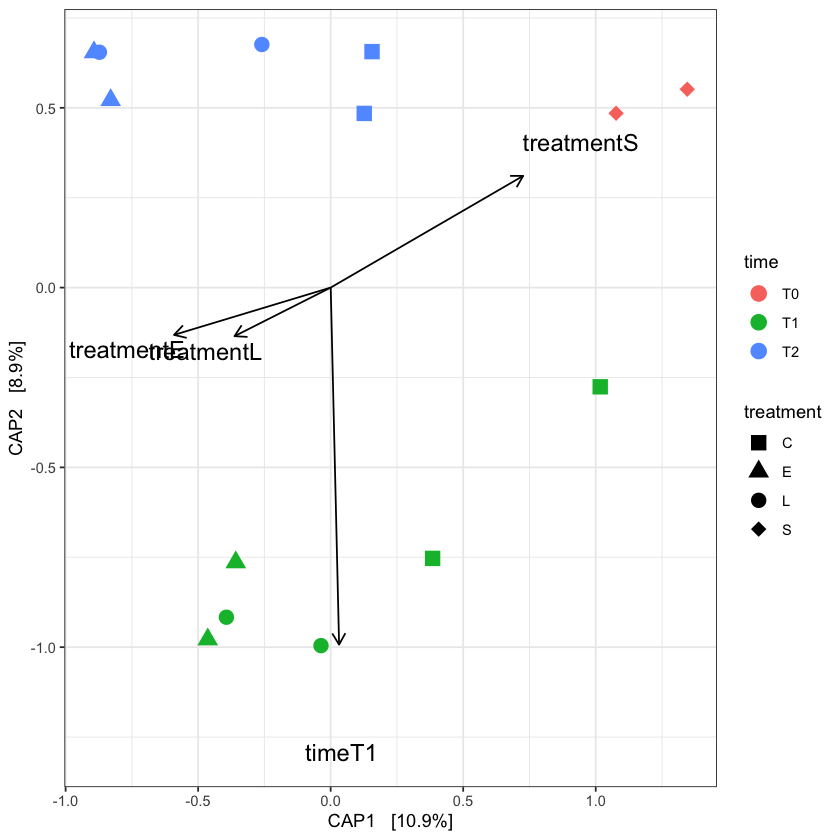

In [31]:
#unweighted UniFrac for CAP ordination at ASV level
buffel.CAP.unifrac=ordinate(buffel, "CAP",distance=buffel.UF, ~treatment + time)
cap_plot=plot_ordination(buffel, buffel.CAP.unifrac, type="samples",color="time",title="Samples: ASV. UniFrac",label="samples", shape="treatment")+ geom_text(mapping = aes(label = samples), hjust=0.5, vjust=-1.5,size = 5) + theme_bw() + geom_point(size = 4)

arrowmat = vegan::scores(buffel.CAP.unifrac, display="bp")
labels=rownames(arrowmat)
arrowdf = data.frame(labels, arrowmat)

# Define the arrow aesthetic mapping
arrow_map = aes(xend = CAP1,
                 yend = CAP2,
                 x = 0,
                 y = 0,
                 shape = NULL,
                 color = black,
                 label = labels)

label_map = aes(x = 1.3 * CAP1,
                 y = 1.3 * CAP2,
                 shape = NULL,
                 color = NULL,
                 label = labels)

arrowhead = arrow(length = unit(0.02, "npc"))

cap_plot = cap_plot  +
  geom_segment(
    mapping = arrow_map,
    size = 0.5,
    data = arrowdf,
    color = "black",
    arrow = arrowhead
  ) +
  geom_text(
    mapping = label_map,
    size = 5, 
    data = arrowdf,
    show.legend = FALSE
  )
cap_plot

In [32]:
#Using ANOSIM to determine significance 
buffel.UF=UniFrac(buffel, weighted=FALSE, normalized=FALSE, fast=TRUE)
tASV=t(ASV)
t=c("E","E","E","E","L","L","L","L","C","C","C","C","S","S")
d=c("20d","20d","40d","40d","20d","20d","40d","40d","20d","20d","40d","40d","0d","0d")

#ANOSIM for unweighted UniFrac
ano5 = anosim(buffel.UF, t, permutations = 9999)
ano5
ano6 = anosim(buffel.UF, d, permutations = 9999)
ano6


Call:
anosim(x = tASV, grouping = t, permutations = 9999, distance = "bray") 
Dissimilarity: bray 

ANOSIM statistic R: 0.1579 
      Significance: 0.0922 

Permutation: free
Number of permutations: 9999



Call:
anosim(x = tASV, grouping = d, permutations = 9999, distance = "bray") 
Dissimilarity: bray 

ANOSIM statistic R: 0.2344 
      Significance: 0.0325 

Permutation: free
Number of permutations: 9999
